## Решение уравнения теплопроводности стержня

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [46]:
class Lab5(object):
    def __init__(self, number_of_rows, number_of_columns, inputs=None):
        self.__number_of_rows = number_of_rows
        self.__number_of_columns = number_of_columns
        if inputs is None:
            self.__init_matrix = self._get_input_matrix()
        else:
            self.__init_matrix = inputs
        self.print_matrix(self.__init_matrix, "Исходные данные")

    def _get_input_matrix(self):
        init_matrix = np.zeros((self.__number_of_columns, self.__number_of_rows))
        for i in range(self.__number_of_columns):
            init_matrix[i, 0] = float(input())
        for j in range(self.__number_of_rows):
            init_matrix[j, 0] = float(input())
            init_matrix[j, self.__number_of_columns] =  float(input())
    
    def __calculate_new_value(self, i, j):
        new_value = (self.__init_matrix[i][j+1] + 
                    4 * self.__init_matrix[i][j] + self.__init_matrix[i][j-1])/6.
        return new_value
        
    
    def _solve(self):
        for i in range(self.__number_of_rows-1):
            for j in range(1, self.__number_of_columns-1):
                self.__init_matrix[i+1][j] = self.__calculate_new_value(i, j)
    
    @staticmethod
    def print_matrix(matrix, message):
        print(message)
        data = pd.DataFrame(matrix)
        display(data)
    
    def plot_results(self):
        plt.figure(dpi=300)
        for i in range(self.__number_of_rows):
            plt.plot(self.__init_matrix[i, :])
        plt.grid(True)
        plt.show()
    
    def main(self):
        self._solve()
        self.print_matrix(self.__init_matrix, "Результат")
        self.plot_results()

Исходные данные


,0,1,2,3,4,5,6,7,8,9,10
0,10.0,15.0,20.0,25.0,30.0,33.0,35.0,37.0,38.0,39.0,40.0
1,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0
2,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0
3,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
4,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
5,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
6,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
7,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
8,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
9,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0


Результат


,0,1,2,3,4,5,6,7,8,9,10
0,10.0,15.000000,20.000000,25.000000,30.000000,33.000000,35.000000,37.000000,38.000000,39.000000,40.0
1,20.0,15.000000,20.000000,25.000000,29.666667,32.833333,35.000000,36.833333,38.000000,39.000000,35.0
2,30.0,16.666667,20.000000,24.944444,29.416667,32.666667,34.944444,36.722222,37.972222,38.166667,33.0
3,40.0,19.444444,20.268519,24.865741,29.212963,32.504630,34.861111,36.634259,37.796296,37.273148,32.0
4,60.0,23.007716,20.897377,24.824074,29.037037,32.348765,34.763889,36.532407,37.515432,36.481481,31.0
5,70.0,28.821373,21.903549,24.871785,28.886831,32.199331,34.656121,36.401492,37.179270,35.740226,30.0
6,80.0,34.531507,23.551226,25.046253,28.769740,32.056713,34.537551,36.240226,36.809799,35.023362,30.0
7,90.0,40.279542,25.630444,25.417663,28.696988,31.922357,34.407858,36.051376,36.417131,34.483875,30.0
8,100.0,46.124769,28.036497,25.999681,28.687995,31.799046,34.267527,35.838415,36.033963,34.058772,30.0
9,105.0,52.089262,30.711740,26.787203,28.758451,31.691951,34.117928,35.609192,35.672173,33.711508,30.0


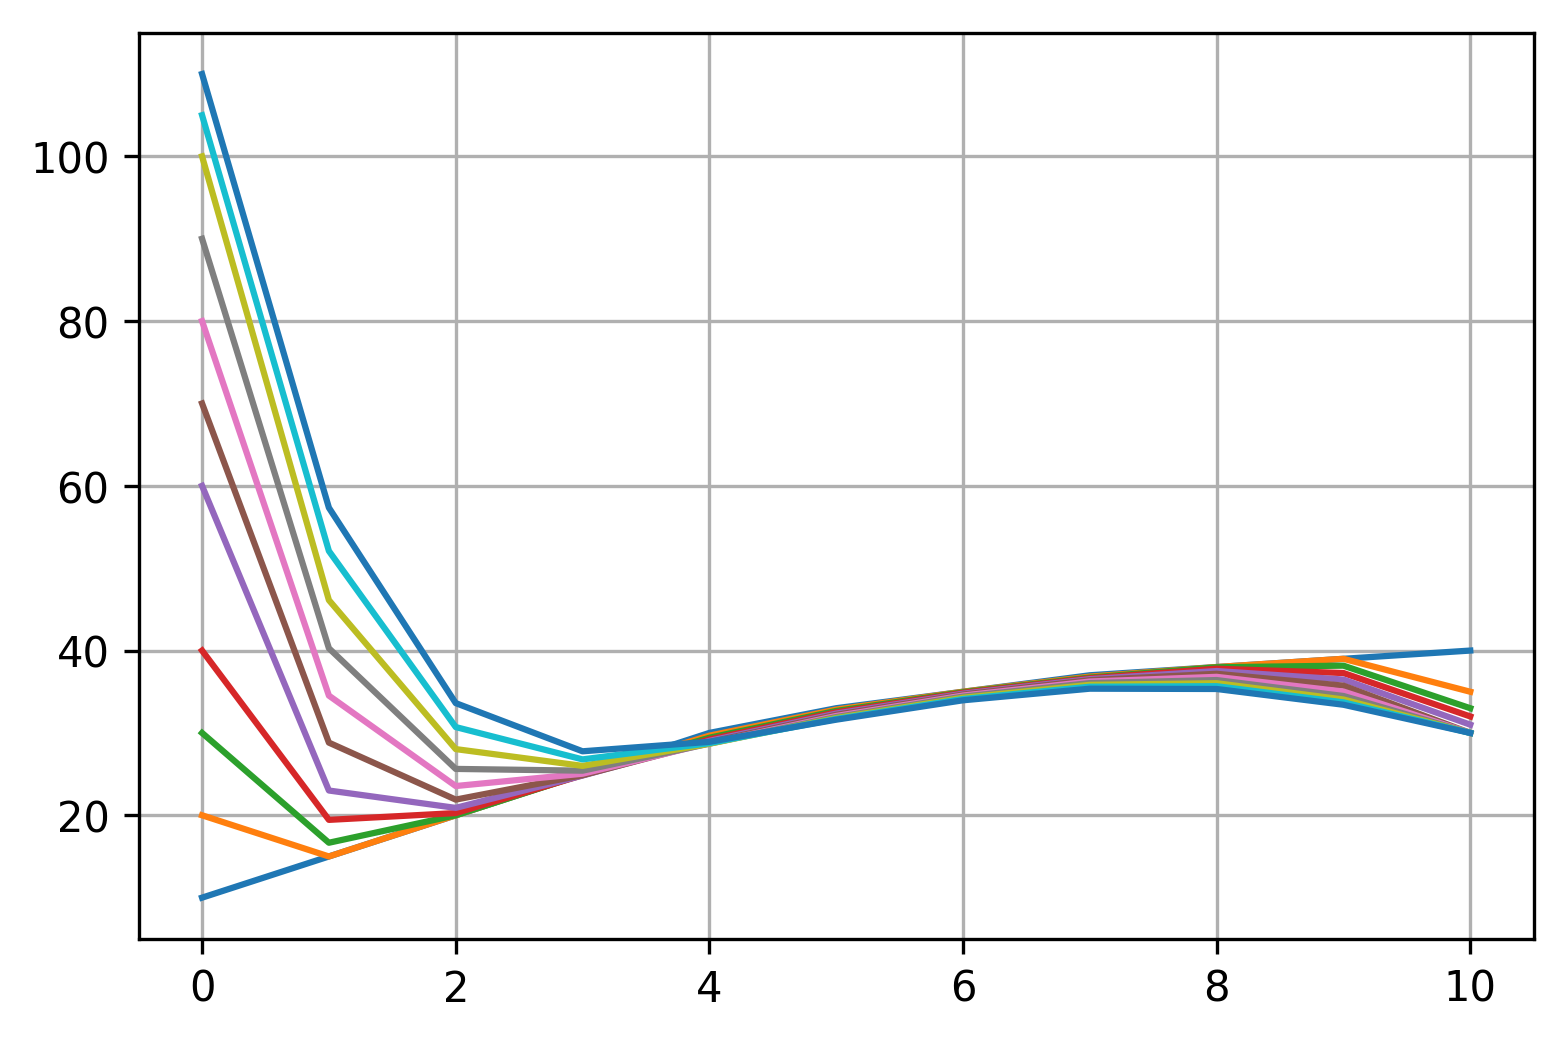

In [47]:
number_of_rows = 11
number_of_columns = 11
input_matrix = np.zeros((number_of_rows, number_of_columns))
first_row = np.array([10., 15., 20., 25., 30., 33., 35., 37., 38., 39., 40.])
first_column = np.array([10., 20., 30., 40., 60., 70., 80., 90., 100., 105., 110.])
last_column = np.array([40., 35., 33., 32., 31., 30., 30., 30., 30., 30., 30.])
input_matrix[0, :] = first_row
input_matrix[:, 0] = first_column
input_matrix[:, -1] = last_column
test = Lab5(number_of_rows, number_of_columns, input_matrix.copy())
test.main()